In [ ]:
# Install geopandas first, if not in your system.

In [ ]:
#!pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd


In [2]:
### Identify and remove duplicates 

import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.read_csv(r'E:/PROFESSION/NG/Research/PN_Raja/Muenster_hai.csv')
duplicates = df.duplicated()
print(df[duplicates])

         AGG_DAY_PERIOD           GEOGRAPHY  ACTIVITY_INDEX_TOTAL      XLON  \
121077       2020-12-27  120203012233211000              0.248520  7.328568   
471474       2020-12-15  120203010231313213              0.220168  7.376633   
7631165      2020-06-24  120203001322223220              0.179793  6.691360   
11132994     2020-04-01  120203012013033212              0.174761  7.331314   
12631634     2020-02-20  120203030032001322              0.380213  7.224197   

               XLAT  
121077    51.644868  
471474    52.122107  
7631165   52.053757  
11132994  51.973461  
12631634  51.447588  


In [3]:
df.head()

,AGG_DAY_PERIOD,GEOGRAPHY,ACTIVITY_INDEX_TOTAL,XLON,XLAT
0,2020-12-31,120203021133103213,0.081590,7.003098,51.442453
1,2020-12-31,120203021130221130,0.016807,6.875381,51.465558
2,2020-12-31,120203021130303123,0.127186,6.917953,51.471547
3,2020-12-31,120203012210111031,0.024016,7.288742,51.833656
4,2020-12-31,120203012112121023,0.033855,7.615585,51.981920


In [4]:
### Identify missing data
import pandas as pd

# Assuming 'df' is your DataFrame
print(df.isnull().sum())

#a. Delete null
# To drop rows with any missing values
#df_cleaned = df.dropna()

# To drop columns with any missing values
#df_cleaned = df.dropna(axis=1)

#b. Impute null
# Impute missing values with mean
#df_cleaned = df.fillna(df.mean())

# Impute missing values with forward-fill
#df_cleaned = df.fillna(method='ffill')

# Impute missing values with backward-fill
#df_cleaned = df.fillna(method='bfill')

#######################  OR  ####################


# Removing invalid rows
#df_cleaned = df.drop(invalid_rows.index)

# Imputing missing or invalid values in numeric columns
#df['numeric_column'].fillna(df['numeric_column'].mean(), inplace=True)

# Imputing missing or invalid values in categorical columns
#df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)


AGG_DAY_PERIOD          0
GEOGRAPHY               0
ACTIVITY_INDEX_TOTAL    0
XLON                    0
XLAT                    0
dtype: int64


In [10]:
### Explore outliers
#a. Remove them
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column containing outliers
Q1 = df['ACTIVITY_INDEX_TOTAL'].quantile(0.25)
Q3 = df['ACTIVITY_INDEX_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(f"{Q1}, {Q3}, {IQR}")

# Filter outliers using the interquartile range (IQR) method
#df_cleaned = df[(df['ACTIVITY_INDEX_TOTAL'] >= Q1 - 1.5 * IQR) & (df['ACTIVITY_INDEX_TOTAL'] <= Q3 + 1.5 * IQR)]
#df_cleaned.head()

#b. Transforming them using log transformation, square root transformation, or Box-Cox transformation
# Log transformation
#df['transformed_log'] = np.log(df['ACTIVITY_INDEX_TOTAL'])

# Square root transformation
#df['transformed_sqrt'] = np.sqrt(df['ACTIVITY_INDEX_TOTAL'])

# Box-Cox transformation (requires data to be positive, so you might need to add a constant if necessary)
from scipy.stats import boxcox
#df['transformed_boxcox'], _ = boxcox(df['ACTIVITY_INDEX_TOTAL'])



0.055415, 0.150588, 0.09517300000000001


In [ ]:
### Correct irrelevant data: Columns with constant values, Columns with mostly missing data, 
### and Data points or rows with missing values in critical fields.
# Removing rows with missing values in critical fields
df_cleaned = df.dropna(subset=['ACTIVITY_INDEX_TOTAL'])

# Removing columns with constant values or high missing value percentage
#df_cleaned = df.drop(columns=['column_with_constant_values', 'column_with_high_missing'])

In [ ]:
### Detect invalid or inconsistent data

# Step 1: Identify Invalid or Inconsistent Data Start by thoroughly examining your dataset and identifying potential issues, 
# such as: Data outside valid ranges, Contradictory information, Format discrepancies, Data type inconsistencies.

# Step 2: Data Validation Perform data validation checks to verify the integrity of the data. Common validation checks include:
# Ensure that numeric values fall within valid ranges, Validate that data entries match the expected format, Cross-check related 
# fields to ensure their consistency.

# Range checks for numeric columns
#invalid_numeric_data = df[(df['ACTIVITY_INDEX_TOTAL'] < lower_bound) | (df['ACTIVITY_INDEX_TOTAL'] > upper_bound)]

# Format checks for date column (assuming 'date_column' is in 'datetime' format)
#invalid_date_format_data = df[~df['AGG_DAY_PERIOD'].dt.strftime(date_format).isin(valid_date_formats)]

# Consistency check for related fields
#inconsistent_data = df[df['related_field1'] != df['related_field2']]

### Data Exploration ###

#### 1. Calculate summary statistics such as mean, median, and mode to understand the central tendencies and distributions of the data. ####

In [11]:
### Mean
mean_value = df['ACTIVITY_INDEX_TOTAL'].mean()

### Median
median_value = df['ACTIVITY_INDEX_TOTAL'].median()

### Mode
mode_value = stats.mode(df['ACTIVITY_INDEX_TOTAL'], keepdims = True)[0][0]

print(f'Mean is : {mean_value}, Median is : {median_value}, and Mode is : {mode_value}')

Mean is : 0.11268904366348204, Median is : 0.10384, and Mode is : 0.065815


#### 2. Visualize the data using graphs, charts, and histograms. This will help to identify any patterns or anomalies in the data. ####


Text(0.5, 1.0, 'Scatter Plot of Geographical Distribution of Human Activity Index')

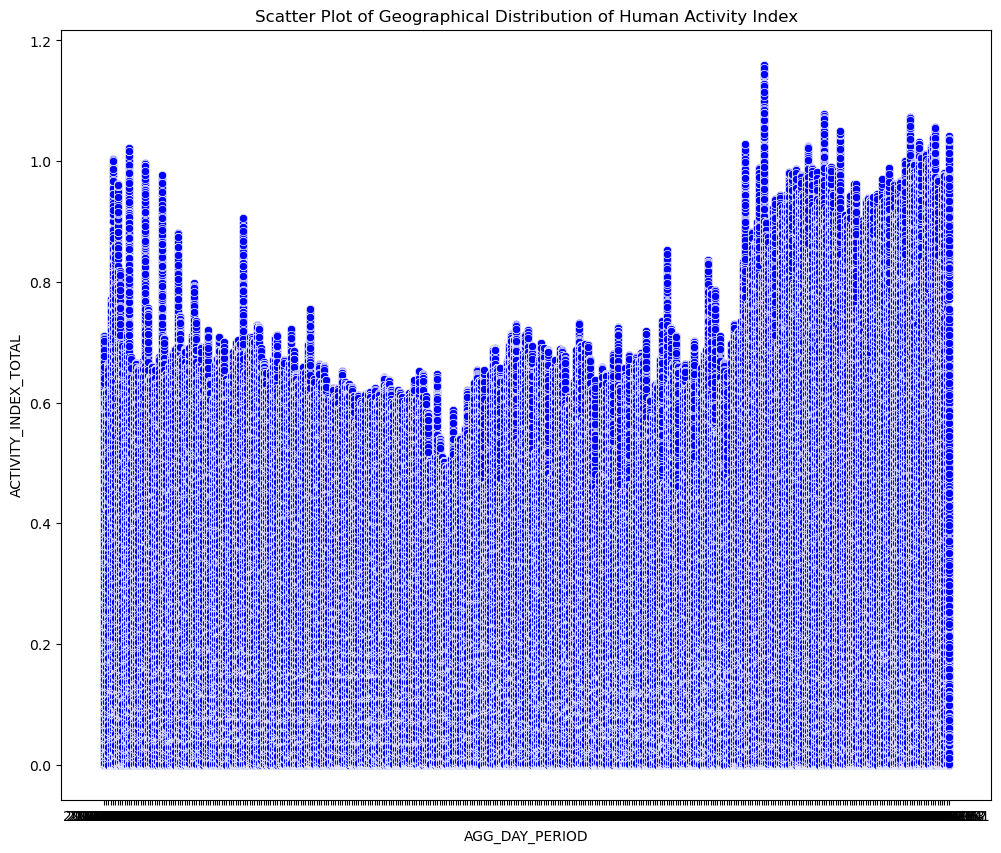

In [18]:
### Scatter plot: Ideally this should be AGG_DAY_PERIOD Vs ACTIVITY_INDEX_TOTAL
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='AGG_DAY_PERIOD', y='ACTIVITY_INDEX_TOTAL', color = 'b')
plt.xlabel('AGG_DAY_PERIOD')
plt.ylabel('ACTIVITY_INDEX_TOTAL')
plt.title('Scatter Plot of Geographical Distribution of Human Activity Index')
plt.show()

### SCATTERPLOT ###

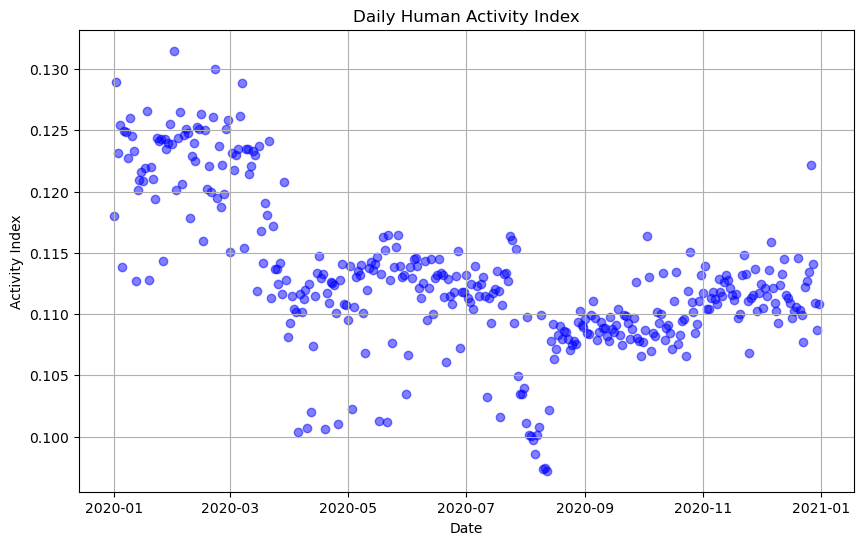

In [19]:


#Scatterplot based on daily aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by day
daily_data = df.groupby(df['date'].dt.date)['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(daily_data.index, daily_data.values, color='blue', alpha=0.5)
plt.title('Daily Human Activity Index')
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


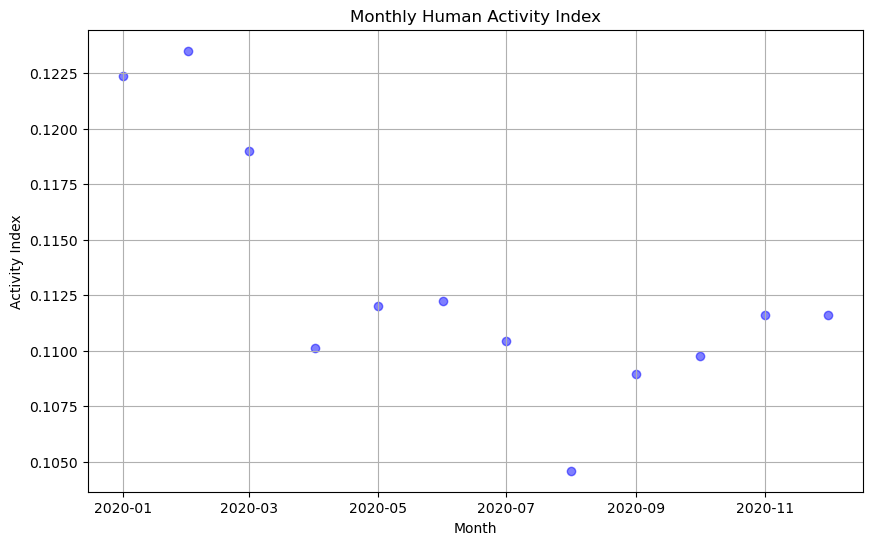

In [24]:
#Scatterplot based on monthly aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by month
monthly_data = df.groupby(df['date'].dt.to_period('M'))['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
monthly_data.index = pd.to_datetime(monthly_data.index.to_timestamp())

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data.index, monthly_data.values, color='blue', alpha=0.5)
plt.title('Monthly Human Activity Index')
plt.xlabel('Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


### LINE CHART

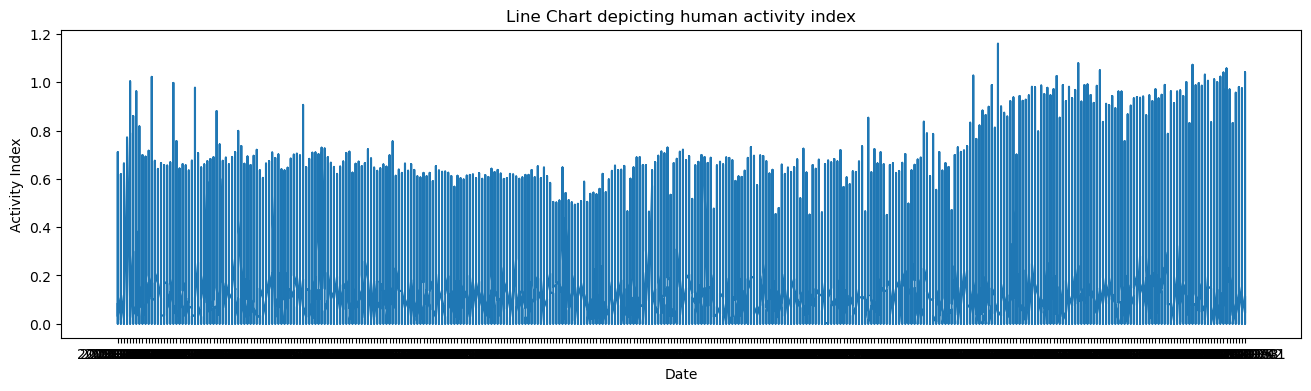

In [25]:
### Line Chart
plt.figure(figsize=(16, 4))
plt.plot(df['AGG_DAY_PERIOD'], df['ACTIVITY_INDEX_TOTAL'])
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.title('Line Chart depicting human activity index')
plt.show()

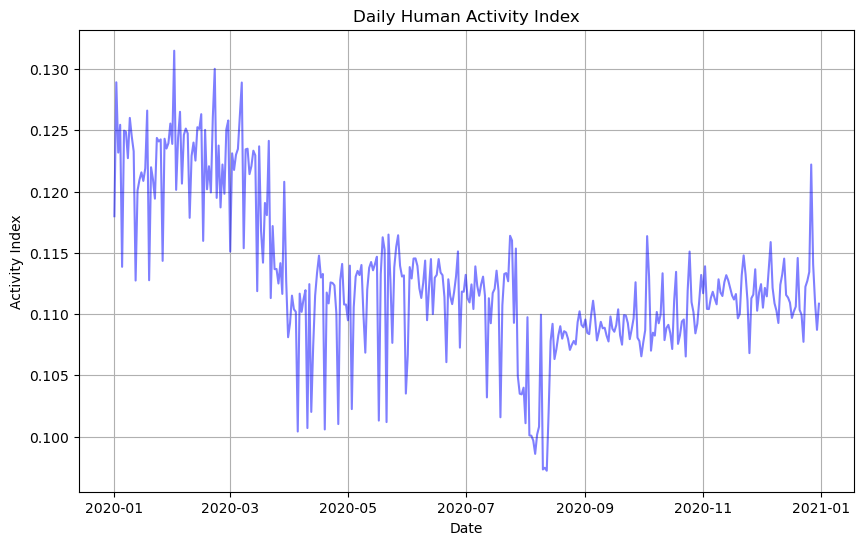

In [29]:


# Line Chart based on daily aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by day
daily_data = df.groupby(df['date'].dt.date)['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data.values, color='blue', alpha=0.5)
plt.title('Daily Human Activity Index')
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


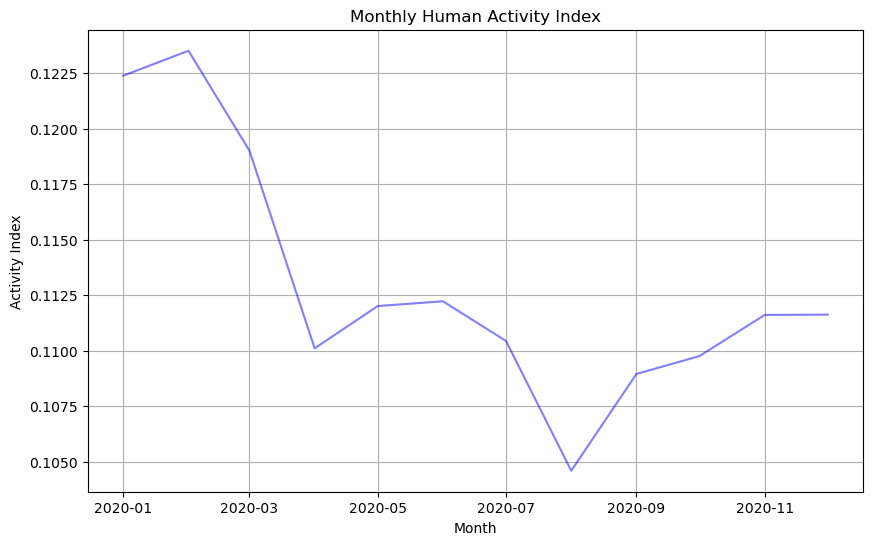

In [30]:
# Line Chart based on monthly aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by month
monthly_data = df.groupby(df['date'].dt.to_period('M'))['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
monthly_data.index = pd.to_datetime(monthly_data.index.to_timestamp())

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data.values, color='blue', alpha=0.5)
plt.title('Monthly Human Activity Index')
plt.xlabel('Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


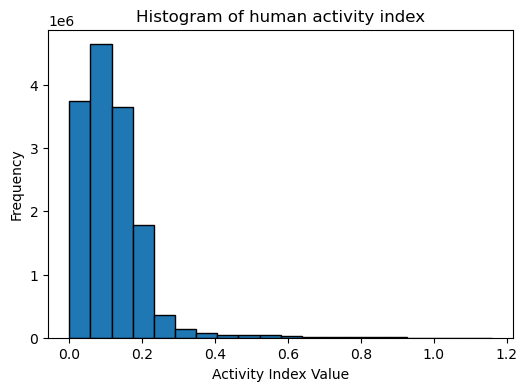

In [28]:
### Histogram
plt.figure(figsize=(6, 4))
plt.hist(df['ACTIVITY_INDEX_TOTAL'], bins=20, edgecolor='black')
plt.xlabel('Activity Index Value')
plt.ylabel('Frequency')
plt.title('Histogram of human activity index')
plt.show()

In [ ]:
### Box Plot
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='ACTIVITY_INDEX_TOTAL')
plt.ylabel('Activity Index Value')
plt.title('Box Plot of Human Activity Index')
plt.show()

#### 3. Examine the correlations between variables using correlation matrices or scatter plots. ####

In [ ]:
### Correlation Matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
### Heatmap
import plotly.express as px

fig = px.density_mapbox(df, lat = 'XLAT', lon = 'XLON', z = 'ACTIVITY_INDEX_TOTAL',
                        radius = 8,
                        center = dict(lat = 49, lon = 12),
                        zoom = 8,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        opacity = 0.5)
fig.show()

#### 4. Use hypothesis tests to form initial insights and generate new hypotheses. ###

In [ ]:
shp.head()

In [ ]:

# Load the shapefile as a GeoDataFrame
shp = gpd.read_file(r"E:\PROFESSION\NG\Research\PN_Raja\DEU_adm\DEU_adm1.shp")

# Load the CSV file as a DataFrame
#csv_df = pd.read_csv('path_to_csv.csv')

# Convert the CSV DataFrame to a GeoDataFrame with point geometry
csv_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.XLON, df.XLAT), crs='EPSG:4326')

# Perform the spatial join
joined_gdf = gpd.sjoin(csv_gdf, shp, how='left', predicate='intersects')

# Create Choropleth map based on provinces
#fig = px.choropleth_mapbox(
#    data_frame = joined_gdf.set_index("ID_1"),    # Using the id as index of the data
 #   geojson = joined_gdf.geometry,                # The geometry
  #  locations = joined_gdf.index,                 # The index of the data
   # color = 'NAME_1',
    #mapbox_style = 'open-street-map',
    #center = dict(lat = 49, lon = 12),
    #zoom = 4)

#fig.show() 

In [ ]:
joined_gdf.head()

In [ ]:
joined_gdf.head(5)

In [ ]:
import geopandas
import plotly.express as px

shp = geopandas.read_file(r"E:\PROFESSION\NG\Research\PN_Raja\DEU_adm\DEU_adm1.shp")
shp = shp.to_crs("WGS84")

fig = px.choropleth_mapbox(
    data_frame = shp.set_index("ID_1"), # Using the id as index of the data
    geojson = shp.geometry,                # The geometry
    locations = shp.index,                 # The index of the data
    color = 'NAME_1',
    mapbox_style = 'open-street-map',
    center = dict(lat = 49, lon = 12),
    zoom = 4)

fig.show() 

In [ ]:
joined_gdf.head()

In [ ]:
spatial autocorrelation

In [ ]:
import numpy as np
import scipy.spatial as spatial
import geopandas as gpd

In [ ]:
#!pip install pysal#
#!pip install libpysal

In [ ]:
import libpysal as ps
import esda

# create a spatial weights object
w = ps.weights.Queen.from_dataframe(joined_gdf, use_index = True)

# display the weights object
#print(w)

# compute Moran's I
mi = esda.moran.Moran(joined_gdf['ACTIVITY_INDEX_TOTAL'], w)

# display the Moran's I statistic
print(mi.I)


In [ ]:
import pysal

# Load the dataset from a CSV file
#data = pd.read_csv('path/to/your/csvfile.csv')

# Create a spatial weights object
w = pysal.weights.Queen.from_dataframe(df)

# Compute the Moran's I index
i = pysal.Moran(data['human_activity_index'], w)

# Print the Moran's I index
print(i.I)

In [ ]:
def calculate_spatial_autocorrelation(df):
    # Calculate the distance matrix between all points
    distances = spatial.distance.pdist(df.geometry.values.data)
    # Get the number of points
    n = len(df)
    # Create a matrix of weights based on the inverse distance between points
    weights = np.array([[1.0 / np.sqrt(distances[i, j])
                         for j in range(n)]
                        for i in range(n)])
    # Calculate the Moran's I statistic
    moran_i = spatial.stats.moran(df.value, weights)
    print(f'Moran\'s I = {moran_i:.4f}')
    # Calculate the p-value
    p_value = 1 - spatial.stats.t_test(df.value, weights)
    print(f'p-value = {p_value:.4f}')

In [ ]:
calculate_spatial_autocorrelation(df)